In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Iris.csv')

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop(columns='Id', axis=1, inplace=True)


In [5]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
data[['Species']].value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

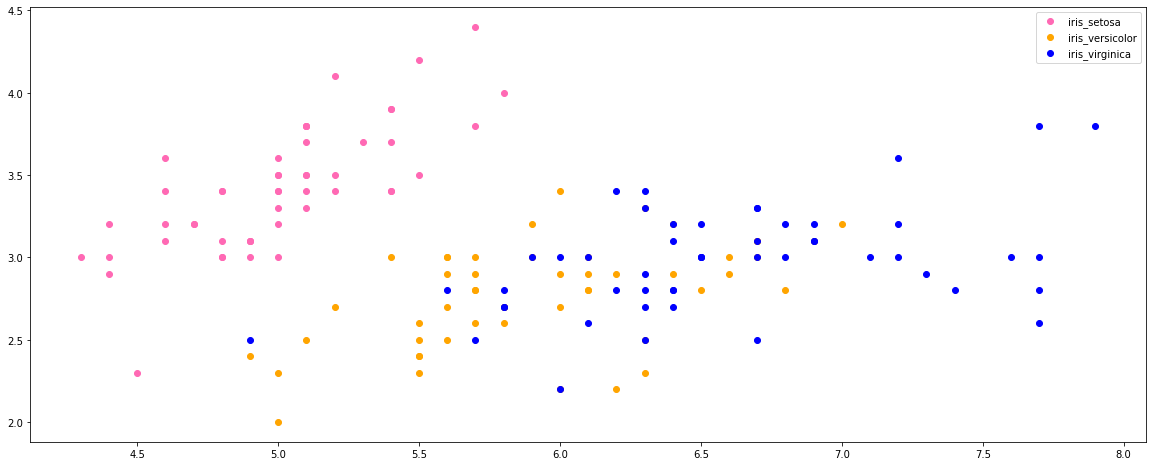

In [7]:
iris_setosa = data[data[list(data.columns)[-1]] == 'Iris-setosa']
iris_versicolor = data[data[list(data.columns)[-1]] == 'Iris-versicolor']
iris_virginica = data[data[list(data.columns)[-1]] == 'Iris-virginica']

fig, axes = plt.subplots(1,1, figsize =(20,8))
axes.scatter(iris_setosa['SepalLengthCm'], iris_setosa['SepalWidthCm'], c = 'hotpink', label = 'iris_setosa')
axes.scatter(iris_versicolor['SepalLengthCm'], iris_versicolor['SepalWidthCm'], c = 'orange', label = 'iris_versicolor')
axes.scatter(iris_virginica['SepalLengthCm'],iris_virginica['SepalWidthCm'], c = 'blue', label = 'iris_virginica')
axes.legend()
plt.show()

In [8]:
#labelling
X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
#scaledX
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scaledX, encodedY, test_size=0.3, random_state=2)

In [9]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)
ypred = dtree.predict(xtest)
ypred == ytest

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [10]:
#evaluation
from sklearn.metrics import confusion_matrix, f1_score
print("Confusion Matrix: \n", confusion_matrix(ypred, ytest))
print("F1 Score:", f1_score(ypred,ytest , average=None))

Confusion Matrix: 
 [[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]
F1 Score: [1.         0.93333333 0.92307692]


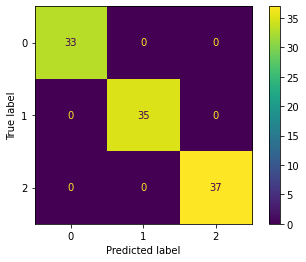

In [11]:
from sklearn import metrics
metrics.plot_confusion_matrix(dtree,xtrain, ytrain)


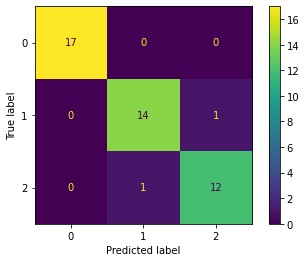

In [12]:
metrics.plot_confusion_matrix(dtree, xtest, ytest)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.model_selection import cross_val_score
model = tree.DecisionTreeClassifier
cv = cross_val_score(
    dtree, scaledX, encodedY, cv = 4, scoring= 'accuracy'
)
cv.mean()

0.9599928876244666

In [15]:
tree.DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [16]:
from sklearn.model_selection import RandomizedSearchCV
d_tree = tree.DecisionTreeClassifier()
gridtree = RandomizedSearchCV(
    d_tree,
    param_distributions= {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'], 
        'max_depth': list(range(5,50,3)), 
        'min_samples_split': list(range(6,40,2)), 
        'max_features': [None, 'auto','sqrt', 'log2'],
    },
    cv = 5, scoring='accuracy', n_iter=15, n_jobs= -1, verbose=2
    
)
gridtree.fit(xtrain,ytrain)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [6, 8, 10, 12, 14,
                                                              16, 18, 20, 22,
                                                              24, 26, 28, 30,
                                                              32, 34, 36, 38],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=2)

In [17]:
gridtree.best_params_

{'splitter': 'random',
 'min_samples_split': 12,
 'max_features': None,
 'max_depth': 29,
 'criterion': 'gini'}

In [26]:
gridtree.best_score_

0.9619047619047618

In [18]:
import warnings
warnings.filterwarnings(action='ignore')

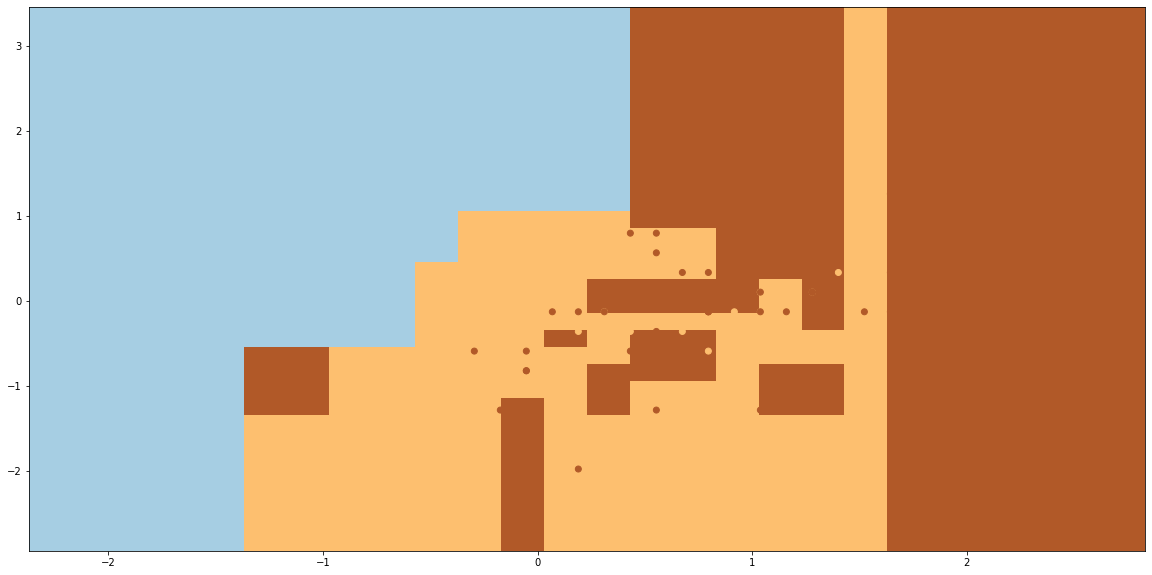

In [19]:
## Analyssis
final_model = tree.DecisionTreeClassifier()
final_model.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, :2][:,0].min() - .5, scaledX[:, :2][:, 0].max() + .5
ymin, ymax = scaledX[:, :2][:, 1].min() - .5, scaledX[:, :2][:, 1].max() + .5

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax,0.2)
)
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z

# Color
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, z)

# Plot
plt.scatter(scaledX[:, :2][:, 0], scaledX[:, :2][:, 1],c=encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

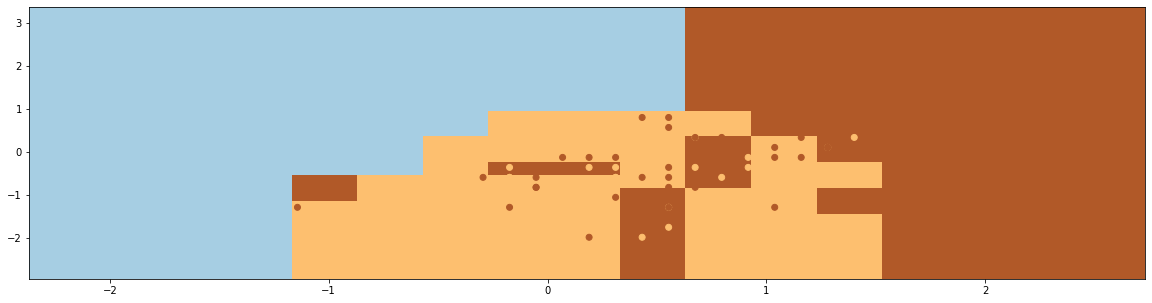

In [20]:
final_model = tree.DecisionTreeClassifier()
final_model.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, 0].min() - 0.5, scaledX[:, 0].max() + 0.5
ymin, ymax = scaledX[:, 1].min() - 0.5, scaledX[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.3), np.arange(ymin, ymax,0.3)
)
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,5))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy,z)

plt.scatter(scaledX[:,0], scaledX[:,1], c = encodedY)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

In [21]:
xx.shape
yy.shape
z.shape

(22, 18)

In [22]:
## Modeling
from sklearn import ensemble

## Initialize
forest = ensemble.RandomForestClassifier(random_state=49)

## Train MOdel
forest.fit(xtrain, ytrain)

## Test Prediction
ypred = forest.predict(xtest)

ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [23]:
## Evaluate
from sklearn.metrics import f1_score, confusion_matrix
print("Confusion Matrix: \n", confusion_matrix(ytest, ypred))
print("F1 Score: ", f1_score(y_true=ytest, y_pred=ypred, average=None))


Confusion Matrix: 
 [[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]
F1 Score:  [1.         0.96551724 0.96296296]


In [24]:
##
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
model = ensemble.RandomForestClassifier(random_state=49)
cv = cross_val_score(
    forest,scaledX,encodedY, cv=5, scoring='accuracy'
)

cv.mean()

0.96

In [25]:
## Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

##
gforest = ensemble.RandomForestClassifier(random_state=49)

##
gridTree = RandomizedSearchCV(
    gforest,
    param_distributions ={
        'criterion': ['gini', 'entropy'],
        'n_estimators': list(range(100,3001,1000)),
        'max_depth': list(range(5,50, 3)),
        'min_samples_split': list(range(2,40,2)),
        'max_features': [None, 'auto', 'sqrt', 'log2'],
        'bootstrap':[True, False],
        'warm_start':[True, False]
    },
    cv =5, scoring='accuracy', n_iter=100, n_jobs = -1, verbose=3
)
gridTree.fit(xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=49),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 34,
                                                              